In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
import yfinance as yf

In [44]:
# Define the ticker symbol
tickerSymbol = 'TSM'

# Get data for the past 5 years
TSMC = yf.Ticker(tickerSymbol)
df = TSMC.history(start = "2022-10-01", end = "2023-02-27")

# Group the data by month
df_monthly = df.resample('M').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

# Reset index and add datetime column
df_monthly = df_monthly.reset_index().rename(columns={'Date': 'datetime'})
# Remove timezone information from datetime column
df_monthly['datetime'] = df_monthly['datetime'].dt.tz_localize(None)
df_monthly = df_monthly.dropna()
# df_monthly.to_excel('TSMC_monthly.xlsx', index=False)

In [45]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-03 00:00:00-04:00,67.345718,68.819646,66.920356,68.503098,11945100,0.0,0.0
2022-10-04 00:00:00-04:00,70.036373,72.143397,69.957235,72.024689,14900700,0.0,0.0
2022-10-05 00:00:00-04:00,72.133510,74.102052,71.797180,73.676689,14037100,0.0,0.0
2022-10-06 00:00:00-04:00,73.172189,74.111940,73.063375,73.548088,11796800,0.0,0.0
2022-10-07 00:00:00-04:00,71.035475,71.253103,68.997696,68.997696,14758600,0.0,0.0


In [46]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-17 00:00:00-05:00,89.504068,89.832361,88.479404,89.633392,11235300,0.0,0.0
2023-02-21 00:00:00-05:00,87.922300,88.956915,87.026967,87.186134,14007600,0.0,0.0
2023-02-22 00:00:00-05:00,87.295567,87.633802,86.211215,86.380333,10106400,0.0,0.0
2023-02-23 00:00:00-05:00,89.832364,91.513607,88.996711,89.613503,15468300,0.0,0.0
2023-02-24 00:00:00-05:00,87.633801,87.693496,86.788205,87.653702,8817600,0.0,0.0


In [47]:
TSMC.actions

,Dividends,Stock Splits
Date,,
2022-12-15 00:00:00-05:00,0.451,0.0


In [48]:
TSMC.major_holders

,0,1
0,0.00%,% of Shares Held by All Insider
1,16.98%,% of Shares Held by Institutions
2,16.98%,% of Float Held by Institutions
3,2066,Number of Institutions Holding Shares


In [49]:
TSMC.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Sanders Capital, LLC",42253560,2022-12-30,0.0081,3913524843
1,JP Morgan Chase & Company,34415110,2022-12-30,0.0066,3187527582
2,Morgan Stanley,32513567,2022-12-30,0.0063,3011406664
3,"FMR, LLC",27780606,2022-12-30,0.0054,2573039804
4,Capital World Investors,25907881,2022-12-30,0.0050,2399588009
5,Bank Of New York Mellon Corporation,26067266,2022-12-30,0.0050,2414350248
6,Massachusetts Financial Services Co.,25025822,2022-12-30,0.0048,2317891702
7,"Fisher Asset Management, LLC",24417775,2022-12-30,0.0047,2261574387
8,Royal Bank of Canada,20904564,2022-12-30,0.0040,1936180775
9,Capital International Investors,18791461,2022-12-30,0.0036,1740465169


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>], dtype=object)

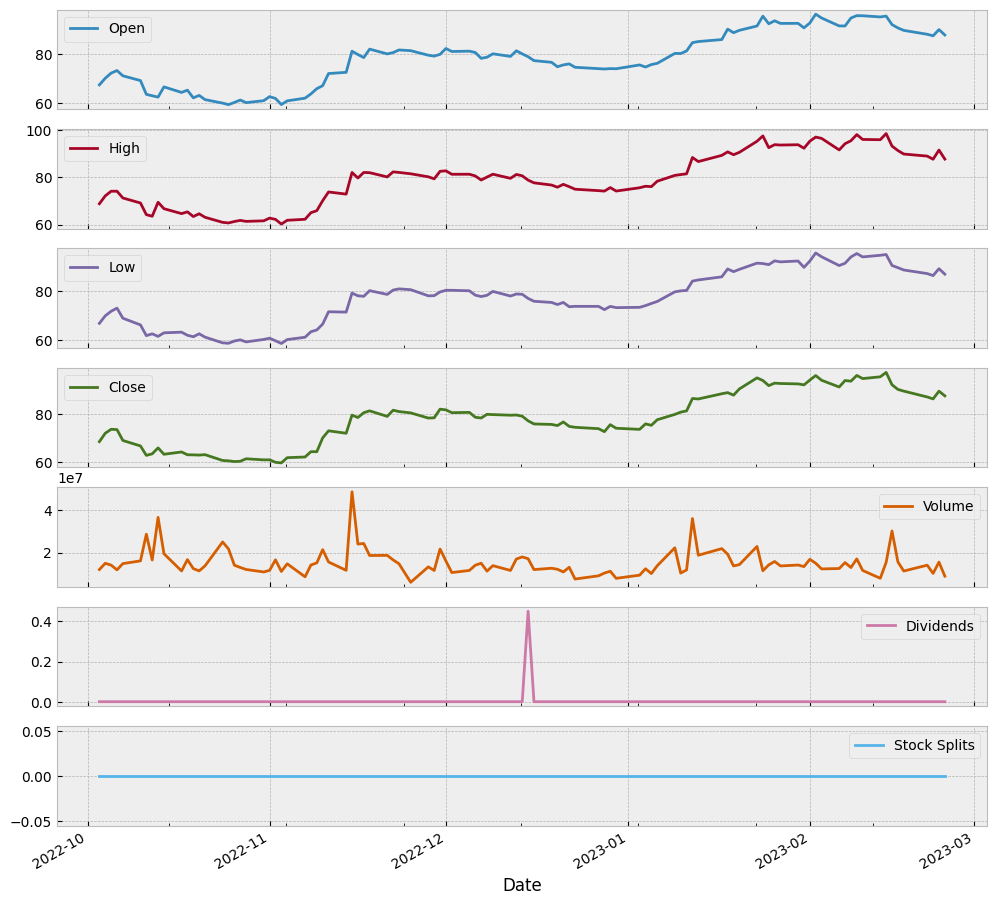

In [50]:
df.plot(kind = "line", figsize = (12, 12), subplots = True)

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use("bmh")

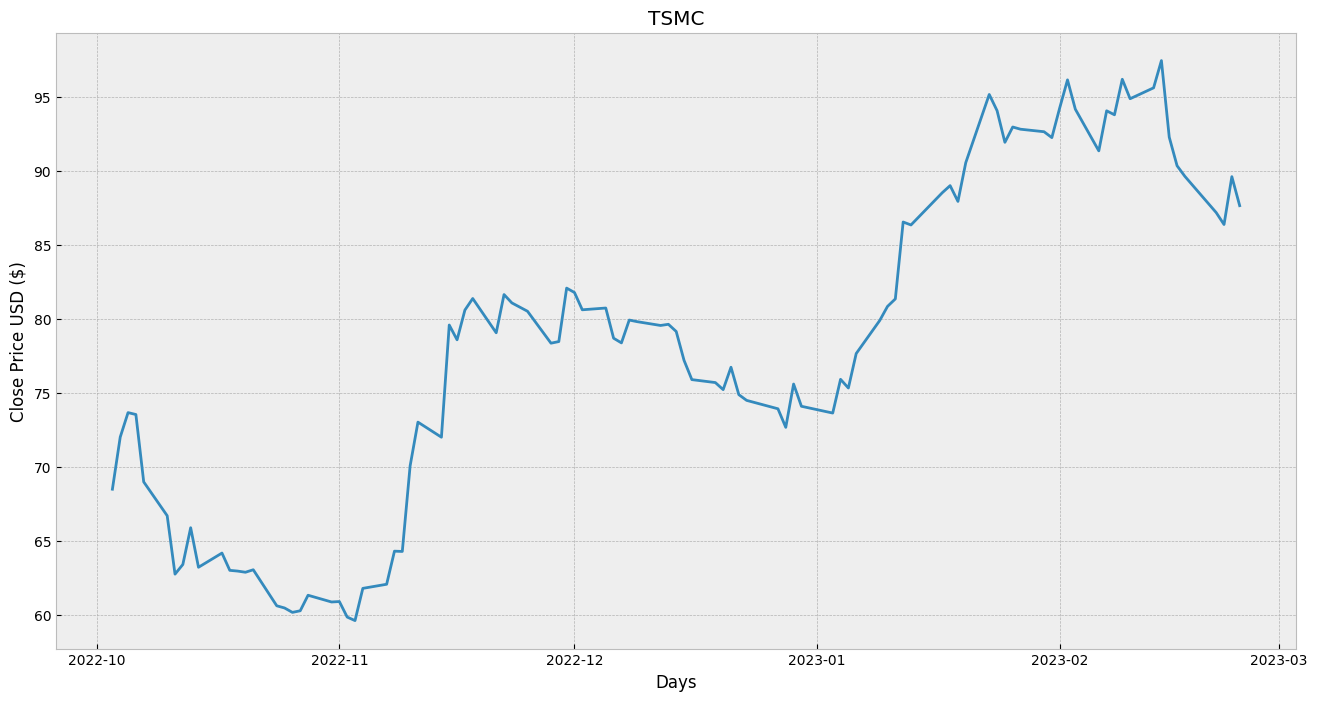

In [52]:
plt.figure(figsize = (16, 8))
plt.title("TSMC")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.show()

In [53]:
future_days = 25
df['Prediction'] = df[["Close"]].shift(-future_days)

In [54]:
X = np.array(df.drop(["Prediction"], 1))[:-future_days]

C:\Users\yewch\AppData\Local\Temp\ipykernel_22308\3112416926.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(["Prediction"], 1))[:-future_days]


In [55]:
y = np.array(df["Prediction"])[:-future_days]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [57]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [58]:
x_future = df.drop(["Prediction"], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\yewch\AppData\Local\Temp\ipykernel_22308\2372999848.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(["Prediction"], 1)[:-future_days]


array([[8.12046080e+01, 8.12046080e+01, 7.87711414e+01, 7.96416550e+01,
        1.69380000e+07, 0.00000000e+00, 0.00000000e+00],
       [7.99483035e+01, 8.06308638e+01, 7.86623218e+01, 7.91569290e+01,
        1.79100000e+07, 0.00000000e+00, 0.00000000e+00],
       [7.87997889e+01, 7.87997889e+01, 7.69892146e+01, 7.72080765e+01,
        1.70802000e+07, 4.51000000e-01, 0.00000000e+00],
       [7.72080748e+01, 7.76557413e+01, 7.58352243e+01, 7.59048615e+01,
        1.19291000e+07, 0.00000000e+00, 0.00000000e+00],
       [7.65216476e+01, 7.67206164e+01, 7.53676589e+01, 7.57058945e+01,
        1.25613000e+07, 0.00000000e+00, 0.00000000e+00],
       [7.47210250e+01, 7.58053765e+01, 7.45121134e+01, 7.52283859e+01,
        1.20806000e+07, 0.00000000e+00, 0.00000000e+00],
       [7.54671391e+01, 7.70190578e+01, 7.53776012e+01, 7.67405090e+01,
        1.08061000e+07, 0.00000000e+00, 0.00000000e+00],
       [7.58849656e+01, 7.60341903e+01, 7.36366674e+01, 7.48901443e+01,
        1.30197000e+07, 0

In [59]:
tree_prediction = tree.predict(x_future)
lr_prediction = lr.predict(x_future)

C:\Users\yewch\AppData\Local\Temp\ipykernel_22308\3854093983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


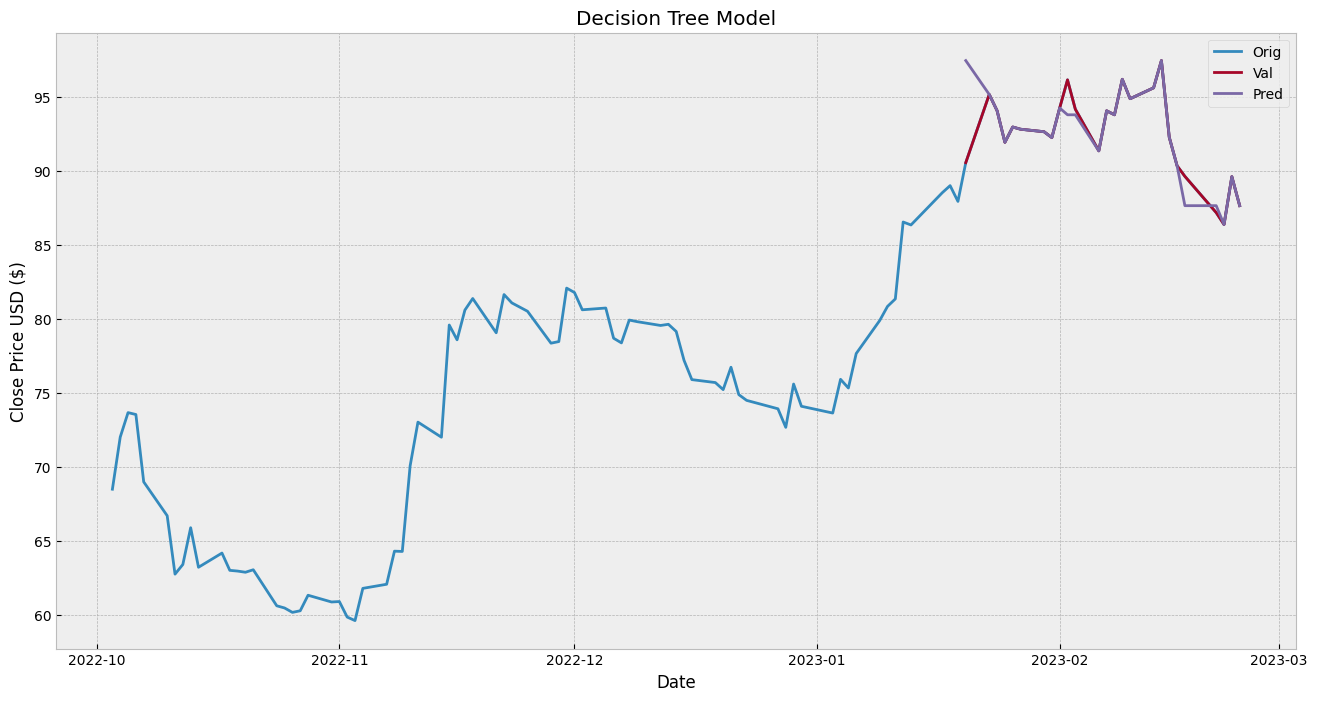

In [63]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize = (16, 8))
plt.title("Decision Tree Model")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Orig", "Val", "Pred"])
plt.show()

C:\Users\yewch\AppData\Local\Temp\ipykernel_22308\2655089370.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


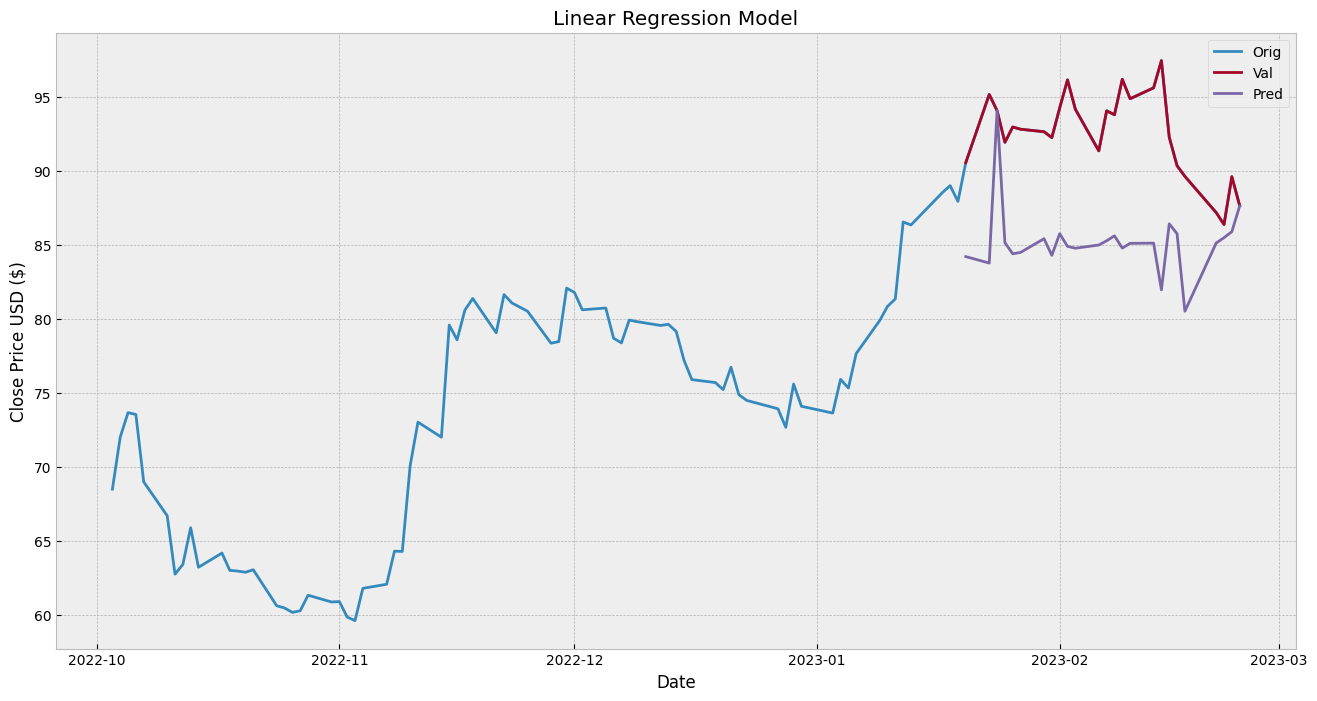

In [64]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize = (16, 8))
plt.title("Linear Regression Model")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Orig", "Val", "Pred"])
plt.show()